In [34]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
import cufflinks as cf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('covid_19_clean_complete.csv')

In [15]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0,emro
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0,euro
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0,afro
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0,euro
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0,afro


In [16]:
def fnc(x):
    if x>80000:
        return 'Death Toll over 80k'
    elif x>50000:
        return 'Death Toll between 50k and 80k'
    elif x>30000:
        return 'Death Toll between 30k and 50k'
    elif x>10000:
        return 'Death Toll between 10k and 30k'
    elif x > 5000:
        return 'Death Toll between 5k and 10k'
    else:
        return 'Death Toll below 5k'

In [17]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0,emro
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0,euro
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0,afro
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0,euro
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0,afro


In [18]:
new = data[data['Date']=='6/3/20']

In [19]:
new = new.groupby('Country/Region').sum()

In [20]:
new['Death Toll'] = new['Deaths'].apply(fnc)

In [21]:
new['Country/Region'] = new.index

In [22]:
new.drop('Country/Region', axis=1, inplace=True)

In [23]:
new = new.reset_index()

In [24]:
new.head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Death Toll
0,Afghanistan,33.0000,65.0000,17267,294,1522,Death Toll below 5k
1,Albania,41.1533,20.1683,1184,33,898,Death Toll below 5k
2,Algeria,28.0339,1.6596,9733,673,6218,Death Toll below 5k
3,Andorra,42.5063,1.5218,851,51,735,Death Toll below 5k
4,Angola,-11.2027,17.8739,86,4,18,Death Toll below 5k


In [25]:
conf= new[new['Confirmed']>100000][['Country/Region','Confirmed', 'Deaths', 'Death Toll']]

In [26]:
conf = conf.sort_values(by='Confirmed')

In [27]:
sns.set_style('darkgrid')

In [28]:
conf.head()

,Country/Region,Confirmed,Deaths,Death Toll
112,Mexico,101238,11729,Death Toll between 10k and 30k
35,Chile,113628,1275,Death Toll below 5k
81,Iran,160696,8012,Death Toll between 5k and 10k
173,Turkey,166422,4609,Death Toll below 5k
133,Peru,178914,4894,Death Toll below 5k


Text(0.5, 1.0, 'Countries with over 100.000 cases')

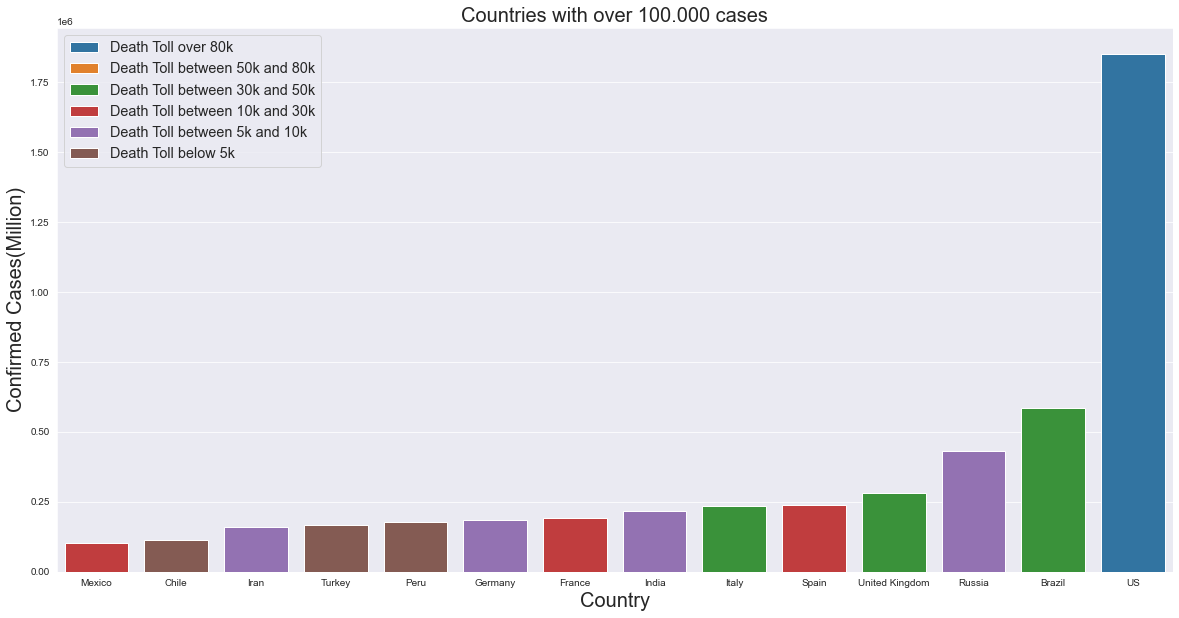

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x=conf['Country/Region'],y=conf['Confirmed'], hue=conf['Death Toll'], dodge=False, 
            hue_order=['Death Toll over 80k','Death Toll between 50k and 80k','Death Toll between 30k and 50k',
                       'Death Toll between 10k and 30k',
                       'Death Toll between 5k and 10k','Death Toll below 5k',])
plt.legend(fontsize='x-large', title_fontsize='40')
plt.xlabel('Country', fontsize='20')
plt.ylabel('Confirmed Cases(Million)', fontsize='20')
plt.title('Countries with over 100.000 cases', fontsize='20')

In [30]:
dt = dict(
        type = 'choropleth',
        locations = new['Country/Region'],
        colorscale = 'plasma',
        reversescale = True,
        locationmode = "country names",
        z = new['Confirmed'],
        text = new['Death Toll'],
        colorbar = {'title' : 'Confirmed Cases'},
      ) 


In [31]:
lay = dict(
    title = 'Confirmed Cases',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

In [32]:
vis = go.Figure(data=[dt], layout = lay)
plot = iplot(vis, validate = False)

In [35]:
go.Figure.write_html

<function plotly.basedatatypes.BaseFigure.write_html(self, *args, **kwargs)>